ANALISIS DEL TRAFICO PORTUARIO MARITIMO EN COLOMBIA

Haremos uso de la metodologi CRIPS-DM , con la finalizacion de realizar y tener buenas praticas en la preparacion de nuestros datos

- Santiago Mendoza Muñoz
- Miguel Legarda Carrillo
- Camilo Andres Armenta


In [ ]:
# Paso 1: Importacion de  librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
def dummies_auto(data,datos=[]):

    for columna in datos:
        # Si la columna tiene exactamente 2 categorías únicas, usa drop_first=True
        if data[columna].nunique() == 2:
            data = pd.get_dummies(data, columns=[columna], drop_first=True)
        # De lo contrario, usa drop_first=False
        else:
            data = pd.get_dummies(data, columns=[columna], drop_first=False)

    return data

# 3.1 INTEGRACION DE DATOS
=============================

In [ ]:
# Cargamos  el dataset directamente desde el portal de datos abiertos
URL = "https://www.datos.gov.co/resource/5r3g-zv5z.csv?$limit=10000"
df = pd.read_csv(URL)

In [ ]:
#Visualizacion de  una muestra en los datos
print("Primeras filas del dataset:")
(df.head())


Primeras filas del dataset:


,zona_portuaria,sociedad_portuaria,tipo_servicio,tipo_carga,exportacion,importacion,transbordo,transito_internacional,fluvial,cabotaje,movilizaciones_a_bordo,transitoria,anno_vigencia,mes_vigencia
0,BARRANQUILLA,SOCIEDAD PORTUARIA MICHELLMAR S.A.,PUBLICO,GRANEL LIQUIDO,0,0,0,0,239,0,0,0,2023,8
1,BARRANCABERMEJA,SOCIEDAD PORTUARIA IMPALA TERMINALS BARRANCABE...,PUBLICO,CONTENEDORES,0,0,0,0,1389,0,0,0,2022,7
2,BARRANCABERMEJA,SOCIEDAD PORTUARIA IMPALA TERMINALS BARRANCABE...,PUBLICO,GENERAL,0,0,0,0,1278,0,0,0,2019,9
3,BARRANQUILLA,COMPA�IA DE PUERTOS ASOCIADOS S.A.,PUBLICO,CARBON AL GRANEL,0,71867,0,0,0,0,0,0,2019,6
4,CARTAGENA,VOPAK COLOMBIA S.A.,PUBLICO,GRANEL LIQUIDO,0,1096,0,0,0,0,0,0,2022,4


In [ ]:
# Mejoramos los nombres de columnas para facilitar el análisis
df.columns = df.columns.str.lower().str.replace(" ", "_")
# Verificamos columnas después del cambio
print("Columnas del DataFrame:")
print(df.columns.tolist())

Columnas del DataFrame:
['zona_portuaria', 'sociedad_portuaria', 'tipo_servicio', 'tipo_carga', 'exportacion', 'importacion', 'transbordo', 'transito_internacional', 'fluvial', 'cabotaje', 'movilizaciones_a_bordo', 'transitoria', 'anno_vigencia', 'mes_vigencia']


In [ ]:
df.info() # Informacion del tipo de datos que tenemos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8297 entries, 0 to 8296
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   zona_portuaria          8297 non-null   object
 1   sociedad_portuaria      8297 non-null   object
 2   tipo_servicio           8297 non-null   object
 3   tipo_carga              8297 non-null   object
 4   exportacion             8297 non-null   int64 
 5   importacion             8297 non-null   int64 
 6   transbordo              8297 non-null   int64 
 7   transito_internacional  8297 non-null   int64 
 8   fluvial                 8297 non-null   int64 
 9   cabotaje                8297 non-null   int64 
 10  movilizaciones_a_bordo  8297 non-null   int64 
 11  transitoria             8297 non-null   int64 
 12  anno_vigencia           8297 non-null   int64 
 13  mes_vigencia            8297 non-null   int64 
dtypes: int64(10), object(4)
memory usage: 907.6+ KB


In [ ]:
# Corrección del tipo de dato usando un ciclo for iteractivo
columnas = ["zona_portuaria", "sociedad_portuaria", "tipo_servicio", "tipo_carga"]
for col in columnas:
    df[col] = df[col].astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8297 entries, 0 to 8296
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   zona_portuaria          8297 non-null   category
 1   sociedad_portuaria      8297 non-null   category
 2   tipo_servicio           8297 non-null   category
 3   tipo_carga              8297 non-null   category
 4   exportacion             8297 non-null   int64   
 5   importacion             8297 non-null   int64   
 6   transbordo              8297 non-null   int64   
 7   transito_internacional  8297 non-null   int64   
 8   fluvial                 8297 non-null   int64   
 9   cabotaje                8297 non-null   int64   
 10  movilizaciones_a_bordo  8297 non-null   int64   
 11  transitoria             8297 non-null   int64   
 12  anno_vigencia           8297 non-null   int64   
 13  mes_vigencia            8297 non-null   int64   
dtypes: category(4), int64(10

🔹 ***3.2 SELECCIÓN DE VARIABLES***
 Objetivo:
Reducir el dataset conservando solo las variables útiles para el modelo de clasificación, eliminando:

 Irrelevantes: columnas que no aportan valor predictivo (por ejemplo, identificadores, direcciones).

 Redundantes: columnas que aportan la misma información que otras ya incluidas.

In [ ]:
#Eliminar columnas irrelevantes (si existieran)
# En este caso, no hay variables personales como ID, nombre, etc.

#  Posible eliminación de columnas redundantes o poco útiles
# Evaluaremos 'transitoria' y 'anno_vigencia'
columnas_eliminar = ['transitoria', 'anno_vigencia']

df = df.drop(columns=columnas_eliminar)

print("Columnas después de selección:")
print(df.columns.tolist())


Columnas después de selección:
['zona_portuaria', 'sociedad_portuaria', 'tipo_servicio', 'tipo_carga', 'exportacion', 'importacion', 'transbordo', 'transito_internacional', 'fluvial', 'cabotaje', 'movilizaciones_a_bordo', 'mes_vigencia']


🔹 3.3 DESCRIPCIÓN ESTADÍSTICA
🎯 Objetivo:
Explorar las características generales de los datos mediante estadísticas descriptivas:

Frecuencias para variables categóricas.

Medidas como media, mediana, desviación estándar, mínimos y máximos para variables numéricas.

In [ ]:
# Variables categoricas
categoricas = ["zona_portuaria", "sociedad_portuaria", "tipo_servicio", "tipo_carga"]

# Revisamos valores únicos y frecuencia por cada variable categórica
for col in categoricas:
    print(f"\n--- {col.upper()} ---")
    print(df[col].value_counts(dropna=False))



--- ZONA_PORTUARIA ---
zona_portuaria
CARTAGENA             2816
BARRANQUILLA          1757
BUENAVENTURA           968
SANTA MARTA            509
GUAJIRA                478
G. MORROSQUILLO        346
SAN ANDRES             343
TURBO                  288
BARRANCABERMEJA        261
Z.P. RIO MAGDALENA     185
CIENAGA                173
TUMACO                 173
Name: count, dtype: int64

--- SOCIEDAD_PORTUARIA ---
sociedad_portuaria
COMPA�IA DE PUERTOS ASOCIADOS S.A.                                  784
SOCIEDAD PORTUARIA REGIONAL DE SANTA MARTA SA                       422
SOCIEDAD PORTUARIA REGIONAL DE BARRANQUILLA S.A.                    389
SOCIEDAD PORTUARIA REGIONAL DE BUENAVENTURA S.A                     345
PALERMO SOCIEDAD PORTUARIA S.A                                      322
PUERTO DE MAMONAL S.A.                                              320
CERREJON ZONA NORTE S.A.                                            295
SOCIEDAD PUERTO INDUSTRIAL AGUADULCE S.A.                   

In [ ]:
# Seleccionamos todas las columnas numéricas automáticamente (int, float)
numericas = df.select_dtypes(include=['number']).columns.tolist()

# Mostramos estadísticas descriptivas
print("\n--- ESTADÍSTICAS DE VARIABLES NUMÉRICAS ---")
display(df[numericas].describe().T)



--- ESTADÍSTICAS DE VARIABLES NUMÉRICAS ---


,count,mean,std,min,25%,50%,75%,max
exportacion,8297.0,112954.487285,495389.114704,0.0,0.0,0.0,29357.0,6147854.0
importacion,8297.0,35930.464746,77470.409980,0.0,0.0,4669.0,36937.0,2278722.0
transbordo,8297.0,18553.850187,133980.828308,0.0,0.0,0.0,0.0,1470313.0
transito_internacional,8297.0,167.239605,1922.388171,0.0,0.0,0.0,0.0,41477.0
fluvial,8297.0,2244.679282,13946.697272,0.0,0.0,0.0,0.0,157133.0
cabotaje,8297.0,5990.498132,34895.135867,0.0,0.0,0.0,0.0,1595355.0
movilizaciones_a_bordo,8297.0,3.512354,165.089388,0.0,0.0,0.0,0.0,12376.0
mes_vigencia,8297.0,6.325660,3.490379,1.0,3.0,6.0,9.0,12.0


In [ ]:
# instalamos para realizar el data profiling y aqui nos saldra un reporte completo de
# la informacion estadistica en nuestro dataset

!pip install ydata-profiling

In [ ]:
from ydata_profiling import ProfileReport

profile_data=ProfileReport(df, minimal=True) # minimal=True
profile_data


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 12/12 [00:00<00:00, 58.09it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# Guardamos el HTML
profile_data.to_file(output_file="reportedata.html")



Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

🔹 3.4 LIMPIEZA DE ATÍPICOS
🎯 Objetivo:
Detectar valores atípicos en variables numéricas, analizar si son errores o valores extremos legítimos, y solo eliminarlos si son claramente erróneos.

In [ ]:
# observamos y analizamos los posibles valores atipicos en nuestro dataframe
def obtener_variables_con_outliers(df, columnas_numericas):
    variables_con_outliers = []
    for col in columnas_numericas:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR
        outliers = df[(df[col] < limite_inferior) | (df[col] > limite_superior)]
        if not outliers.empty:
            variables_con_outliers.append(col)
    return variables_con_outliers

# Obtener lista de variables numéricas
variables_numericas = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Identificar las que tienen outliers
vars_con_outliers = obtener_variables_con_outliers(df, variables_numericas)
print("Variables con outliers detectados:")
print(vars_con_outliers)


Variables con outliers detectados:
['exportacion', 'importacion', 'transbordo', 'transito_internacional', 'fluvial', 'cabotaje', 'movilizaciones_a_bordo']


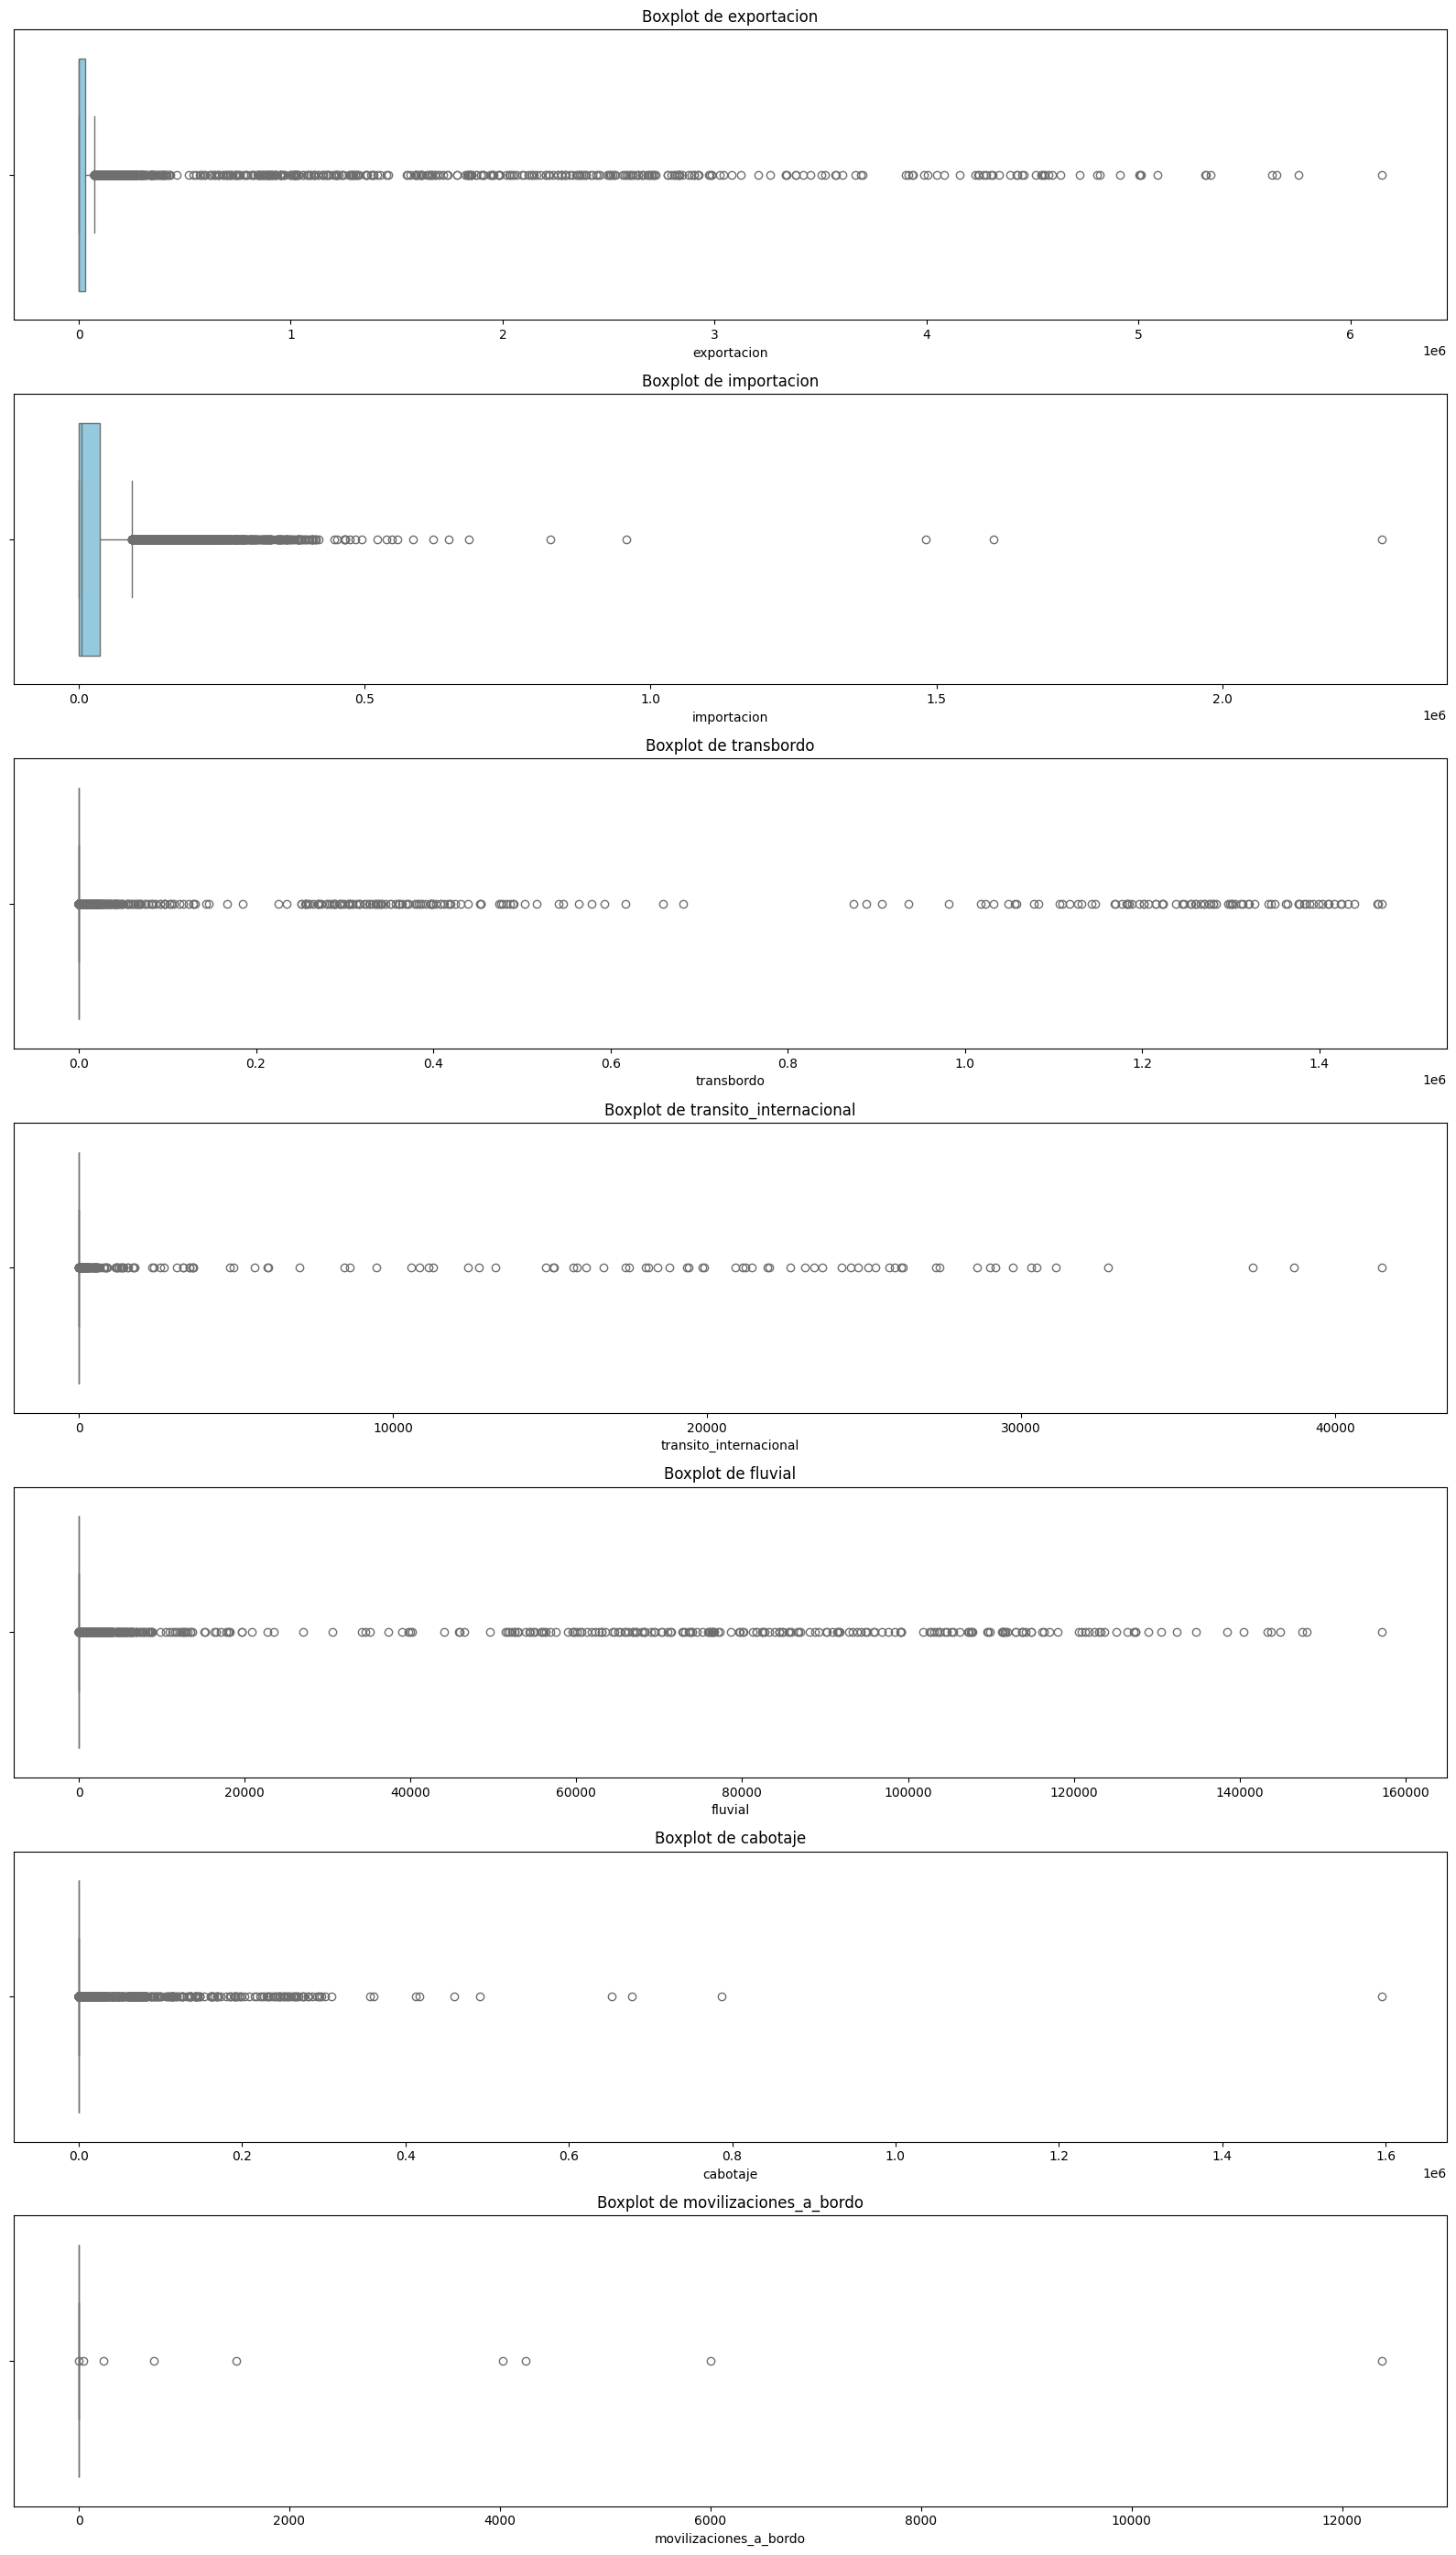

In [ ]:

# Crear boxplots solo de las variables con outliers detectados
plt.figure(figsize=(16, 4 * len(vars_con_outliers)))

for i, col in enumerate(vars_con_outliers, 1):
    plt.subplot(len(vars_con_outliers), 1, i)
    sns.boxplot(data=df, x=col, color='skyblue')
    plt.title(f"Boxplot de {col}", fontsize=12)

plt.tight_layout()
plt.show()


In [ ]:
# Lista de variables con outliers a tratar
variables_outliers = [
    'exportacion', 'importacion', 'transbordo',
    'transito_internacional', 'fluvial',
    'cabotaje', 'movilizaciones_a_bordo'
]

def asignar_nan_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Reemplaza por NaN los valores fuera del rango IQR
    df.loc[(df[col] < limite_inferior) | (df[col] > limite_superior), col] = np.nan

for col in variables_outliers:
    asignar_nan_outliers(df, col)

df[variables_outliers].isnull().sum()


,0
exportacion,1288
importacion,984
transbordo,960
transito_internacional,220
fluvial,586
cabotaje,2062
movilizaciones_a_bordo,9


🔹 3.5 LIMPIEZA DE NULOS
🎯 Objetivo:
La limpieza de valores nulos busca garantizar que no haya datos faltantes que puedan afectar negativamente los algoritmos de machine learning. En esta etapa se reemplazan los valores ausentes de forma controlada mediante imputación estadística.

Para las variables numéricas, se usa la media como estimación central.

Para las variables categóricas, se utiliza la moda, es decir, el valor más frecuente.

Esta estrategia mantiene la integridad del dataset sin eliminar registros completos.

In [ ]:
# Imputación para variables numéricas (media)
variables_numericas = df.select_dtypes(include=['float64', 'int64']).columns

for col in variables_numericas:
    if df[col].isnull().sum() > 0:
        media = df[col].mean()
        df[col].fillna(media, inplace=True)

<ipython-input-81-0ccbe8fc3110>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(media, inplace=True)


In [ ]:
# Imputación para variables categóricas (moda)
variables_categoricas = df.select_dtypes(include=['object']).columns

for col in variables_categoricas:
    if df[col].isnull().sum() > 0:
        moda = df[col].mode()[0]
        df[col].fillna(moda, inplace=True)

In [ ]:
# Verificamos a ver como nos quedo el proceso de  si aún quedan nulos o que
print("Valores nulos restantes por columna:")
print(df.isnull().sum())

Valores nulos restantes por columna:
zona_portuaria            0
sociedad_portuaria        0
tipo_servicio             0
tipo_carga                0
exportacion               0
importacion               0
transbordo                0
transito_internacional    0
fluvial                   0
cabotaje                  0
movilizaciones_a_bordo    0
mes_vigencia              0
dtype: int64


CREACION DE NUEVAS VARIABLES
Aqui basicamente el grupo decidio no realizar la creacion de nuevas variables ya que no se considera perninente y ademas no hay una razon objetivo para llevar acabo este paso ❤

-3.7 ANALISIS DE CORRELACIONES PARA REDUNDANCIA

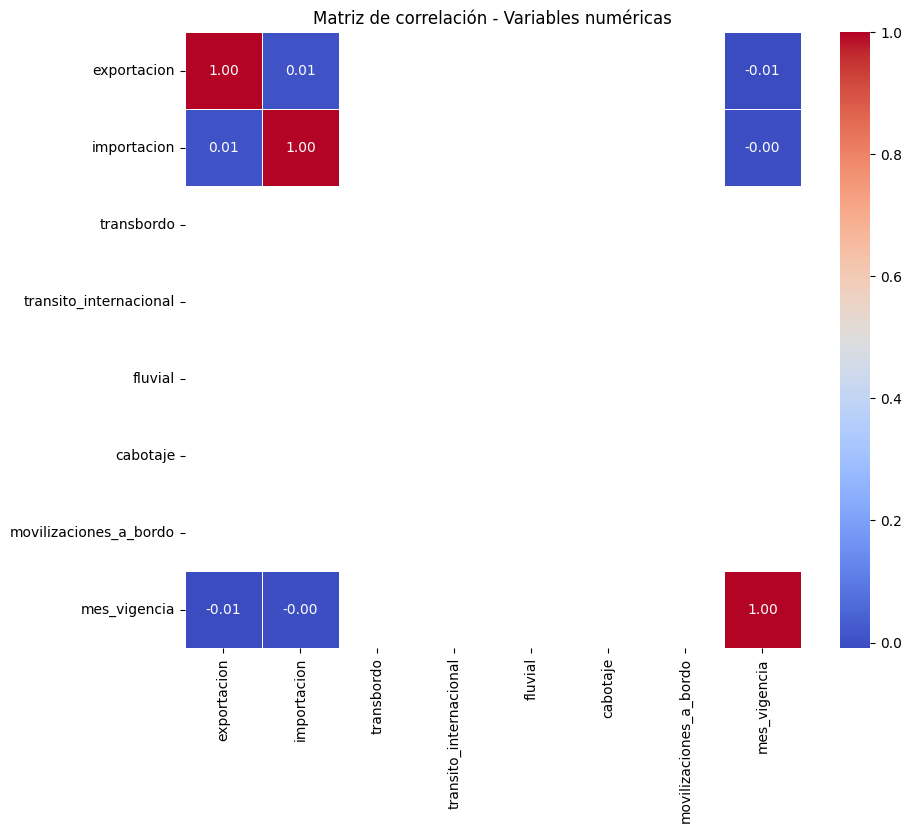

In [ ]:

# Selección de variables numéricas
variables_numericas = df.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
correlacion = variables_numericas.corr(method='pearson')

plt.figure(figsize=(10, 8))
sns.heatmap(correlacion, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title("Matriz de correlación - Variables numéricas")
plt.show()


- No hay variables redundantes : Ninguna correlación supera el umbral de 0.3 en valor absoluto, por lo que no es necesario eliminar variables por multicolinealidad.


🔹 3.8 ANÁLISIS DE CORRELACIONES PARA IRRELEVANCIA (PREDICCIÓN)

🎯 Objetivo:

Evaluamos qué variables tienen poco aporte informativo respecto a la variable objetivo, con el fin de eliminarlas y reducir la dimensionalidad del dataset sin perder poder predictivo.

In [ ]:
# definimos funcion entropia
def entropia(x):
    pr = np.array(x) / np.sum(x)
    pr = pr[pr > 0]
    return -np.sum(pr * np.log2(pr))

print('Entropia(x)=',entropia(df['tipo_servicio'].value_counts().values))

Entropia(x)= 0.6730505388365804


In [ ]:
# definimos informacion condicional
def informacion_condicional(data, columna, funcion_info, target):
    I_cond = 0
    for valor in data[columna].dropna().unique():
        subconjunto = data[data[columna] == valor]
        cnt = subconjunto[target].value_counts()
        I_sub = funcion_info(cnt.values)
        peso = cnt.sum() / len(data)
        I_cond += peso * I_sub
    return I_cond


In [ ]:
# definimos funcion de ganancia
def ganancia_informacion(data, columna, funcion_info, target):
    total_entropy = funcion_info(data[target].value_counts().values)
    cond_entropy = informacion_condicional(data, columna, funcion_info, target)
    return total_entropy - cond_entropy



In [ ]:
# calculo de ganancia para las variables
# Variable objetivo
target = 'tipo_servicio'

# Variables predictoras
variables_predictoras = df.drop(columns=[target]).columns.tolist()

# Calcular la ganancia de información
ganancia_dict = {}
for col in variables_predictoras:
    ganancia_dict[col] = ganancia_informacion(df, col, entropia, target)

# Convertir a Series y ordenar
ganancias = pd.Series(ganancia_dict).sort_values(ascending=False)
print("Ganancia de información por variable:")
display(ganancias)


Ganancia de información por variable:


,0
sociedad_portuaria,0.673051
importacion,0.292016
exportacion,0.131950
zona_portuaria,0.099923
tipo_carga,0.055127
mes_vigencia,0.000103
transbordo,0.000000
transito_internacional,0.000000
fluvial,0.000000
cabotaje,0.000000


In [ ]:
# Definir un umbral para considerar irrelevancia (ajustable)
umbral = 0.01
variables_irrelevantes = ganancias[ganancias < umbral].index.tolist()

print("Variables consideradas irrelevantes y eliminadas:")
print(variables_irrelevantes)

# Eliminar del DataFrame
df = df.drop(columns=variables_irrelevantes)


Variables consideradas irrelevantes y eliminadas:
['mes_vigencia', 'transbordo', 'transito_internacional', 'fluvial', 'cabotaje', 'movilizaciones_a_bordo']


🔹 3.8 TRANSFORMACIONES

🎯 Objetivo:
Transformar las variables categóricas en representaciones numéricas para que puedan ser interpretadas por los algoritmos de aprendizaje automático. Se utilizarán técnicas diferentes para la variable objetivo (tipo_servicio) y para las variables predictoras categóricas.

In [ ]:
# importaciones necesarias
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

In [ ]:
columnas_numericas = df.select_dtypes(include=['number']).columns.tolist()
columnas_categoricas = df.select_dtypes(include=["category","object"]).columns.tolist()
columnas_categoricas = [col for col in columnas_categoricas if col != 'tipo_servicio']

In [ ]:
#Dummies en las variables predictoras
df = dummies_auto(df,columnas_categoricas)
df

,tipo_servicio,exportacion,importacion,zona_portuaria_BARRANCABERMEJA,zona_portuaria_BARRANQUILLA,zona_portuaria_BUENAVENTURA,zona_portuaria_CARTAGENA,zona_portuaria_CIENAGA,zona_portuaria_G. MORROSQUILLO,zona_portuaria_GUAJIRA,...,sociedad_portuaria_SOCIEDAD PUERTO INDUSTRIAL AGUADULCE S.A.,sociedad_portuaria_TERMINAL DE CONTENEDORES DE CARTAGENA S. A.,sociedad_portuaria_UNIBAN LOGISTICA S.A,sociedad_portuaria_VOPAK COLOMBIA S.A.,sociedad_portuaria_ZONA FRANCA ARGOS S.A.S.,tipo_carga_CARBON AL GRANEL,tipo_carga_CONTENEDORES,tipo_carga_GENERAL,tipo_carga_GRANEL LIQUIDO,tipo_carga_GRANEL SOLIDO DIFER. DE CARBON
0,1,0.000000,0.0,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,1,0.000000,0.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,1,0.000000,0.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,1,0.000000,71867.0,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,1,0.000000,1096.0,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8292,1,7661.812955,0.0,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
8293,1,1383.000000,555.0,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
8294,1,7661.812955,53550.0,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
8295,0,7661.812955,0.0,False,False,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False


In [ ]:
df_normalizado =df.copy()

In [ ]:
from sklearn.preprocessing import StandardScaler

# Inicializar el estandarizador
scaler = StandardScaler()

# Estandarizar solo las columnas numéricas
df_normalizado[columnas_numericas] = scaler.fit_transform(df_normalizado[columnas_numericas])

# Revisar los datos estandarizados
df_normalizado.head()

#Publico: 1
#Privado: 0

,tipo_servicio,exportacion,importacion,zona_portuaria_BARRANCABERMEJA,zona_portuaria_BARRANQUILLA,zona_portuaria_BUENAVENTURA,zona_portuaria_CARTAGENA,zona_portuaria_CIENAGA,zona_portuaria_G. MORROSQUILLO,zona_portuaria_GUAJIRA,...,sociedad_portuaria_SOCIEDAD PUERTO INDUSTRIAL AGUADULCE S.A.,sociedad_portuaria_TERMINAL DE CONTENEDORES DE CARTAGENA S. A.,sociedad_portuaria_UNIBAN LOGISTICA S.A,sociedad_portuaria_VOPAK COLOMBIA S.A.,sociedad_portuaria_ZONA FRANCA ARGOS S.A.S.,tipo_carga_CARBON AL GRANEL,tipo_carga_CONTENEDORES,tipo_carga_GENERAL,tipo_carga_GRANEL LIQUIDO,tipo_carga_GRANEL SOLIDO DIFER. DE CARBON
0,1,-0.50465,-0.684400,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,1,-0.50465,-0.684400,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,1,-0.50465,-0.684400,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,1,-0.50465,2.829591,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,1,-0.50465,-0.630810,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False


In [ ]:

# Crear codificador
le = LabelEncoder()

# Aplicar a la variable objetivo
df['tipo_servicio'] = le.fit_transform(df['tipo_servicio'])

# Ver los valores asignados
print("Codificación de tipo_servicio:")
for i, clase in enumerate(le.classes_):
    print(f"{clase} → {i}")


Codificación de tipo_servicio:
PRIVADO → 0
PUBLICO → 1


🔹 3.9 BALANCEO (CLASIFICACIÓN)

🎯 Objetivo:
Asegurar que el modelo de clasificación no favorezca a la clase mayoritaria, mejorando su capacidad para aprender de ambas clases (público y privado).
Se utilizará la técnica SMOTE (Synthetic Minority Oversampling Technique) para sobremuestrear la clase minoritaria.

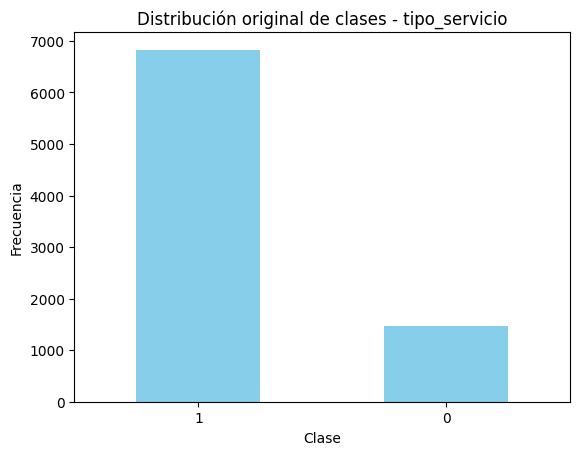

In [ ]:

# Contar clases y observamos si hay desbalanceo
df['tipo_servicio'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Distribución original de clases - tipo_servicio")
plt.xlabel("Clase")
plt.ylabel("Frecuencia")
plt.xticks(rotation=0)
plt.show()
#Publico: 1
#Privado: 0

In [ ]:
# Separar variables predictoras (X) y objetivo (y)
X = df_normalizado.drop(columns=['tipo_servicio'],axis=1)
y = df_normalizado['tipo_servicio']

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Paso 1: Dividir los datos en entrenamiento y prueba (70% - 30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Paso 2: Aplicar SMOTE solo al conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Paso 3: El conjunto de prueba no se modifica
# X_test y y_test se mantienen igual

Distribución de clases en el conjunto de entrenamiento original:
tipo_servicio
1    4782
0    1025
Name: count, dtype: int64

Distribución de clases en el conjunto de entrenamiento resampleado:
tipo_servicio
1    4782
0    4782
Name: count, dtype: int64


GUARDAMOS LOS DATOS DE PROCESAMIENTO

In [ ]:

# Combinar los datos resampleados para guardarlos
df_train_resampled = pd.concat([X_train_resampled, y_train_resampled], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

# Verificar la distribución de clases después del balanceo
print("Distribución de clases en el conjunto de entrenamiento original:")
print(y_train.value_counts())
print("\nDistribución de clases en el conjunto de entrenamiento resampleado:")
print(y_train_resampled.value_counts())

# Guardar los datos en archivos CSV
df_train_resampled.to_csv('train_resampled.csv', index=False)
df_test.to_csv('test.csv', index=False)

print("\nDatos guardados en 'train_resampled.csv' y 'test.csv'")

Distribución de clases en el conjunto de entrenamiento original:
tipo_servicio
1    4782
0    1025
Name: count, dtype: int64

Distribución de clases en el conjunto de entrenamiento resampleado:
tipo_servicio
1    4782
0    4782
Name: count, dtype: int64

Datos guardados en 'train_resampled.csv' y 'test.csv'
